# Helper Functions

In [2]:
import matplotlib.pyplot as plt
def cv2_imshow(img):
    plt.figure(figsize=[5,5])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
from urllib.request import urlopen, Request
def urlToImage(url:str):
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    resp = urlopen(req)
    arr = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    return img

In [4]:
def drawFeatures(features, image, color = [0, 255, 0]):
    for key in features.keys():
        if key in ['Left_eye', 'Right_eye', 'Mouth']:
            feat = features[key]
            rect = [(feat['center'][0], feat['center'][1]),(feat['width'], feat['height']), feat['rotation']]
            box = np.int0(cv2.boxPoints(rect))
            image = cv2.drawContours(image, [box], 0, color, 2)
    return image
    

# Feature Extractor

In [5]:
import cv2
import numpy as np
from utils.FeatureExtractor import FeatureExtractor

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# class FeatureExtractor2(FeatureExtractor):
#     def __init__(self, image):
#         super().__init__(image)

#     # Main method that extracts different features
#     def extractFeatures2(self, faceOrient=True, extractMouth=True, compress=False):
#         """ 
#         A quick guide to different features IDs

#         Left Eye Left Point --> 130
#         Left Eye Right Point --> 243
#         Left Eye Upper Point --> 27
#         Left Eye Lower Point --> 23

#         Right Eye Left Point --> 463
#         Right Eye Right Point --> 359
#         Right Eye Upper Point --> 257
#         Right Eye Lower Point --> 253

#         Face Center Point --> 5
#         Face Left Point --> 93
#         Face Right Point --> 323

#         Mouth Left Point --> 61
#         Mouth Right Point --> 291
#         Upper Lip Upper Point --> 0
#         Upper Lip Lower Point --> 13
#         Lower Lip Upper Point --> 14
#         Lower Lip Lower Point --> 17

#         Hat Center --> 10
#         """

#         # Call the processImg() method
#         height, width, _ = self.processImg(compress)

#         # Proceed if face landmarks are detected
#         if self.__results.multi_face_landmarks != None:
#             counter = 0  # Keeps track of number of faces
            
#             for facial_landmarks in self.__results.multi_face_landmarks:
#                 landmarks = facial_landmarks.landmark

#                 """ Left Eye Attributes """
#                 leftEyeW = self.__calcDistance(landmarks[130], landmarks[243], width, height)  # Width
#                 leftEyeH = self.__calcDistance(landmarks[27], landmarks[23], width, height)  # Height
#                 leftEyeMid = self.__midpoint(landmarks[27], landmarks[23], width, height)  # Midpoint

#                 leftEyeDX = int((landmarks[130].x) * width) - int((landmarks[243].x) * width)
#                 leftEyeDY = int((landmarks[130].y) * height) - int((landmarks[243].y) * height)
#                 leftEyeAngle = round((np.degrees(np.arctan2(leftEyeDY, leftEyeDX)) - 180))  # Rotation Angle

#                 """ Right Eye Attributes """
#                 rightEyeW = self.__calcDistance(landmarks[463], landmarks[359], width, height)  # Width
#                 rightEyeH = self.__calcDistance(landmarks[257], landmarks[253], width, height)  # Height
#                 rightEyeMid = self.__midpoint(landmarks[257], landmarks[253], width, height)  # Midpoint

#                 rightEyeDX = int((landmarks[463].x) * width) - int((landmarks[359].x) * width)
#                 rightEyeDY = int((landmarks[463].y) * height) - int((landmarks[359].y) * height)
#                 rightEyeAngle = round((np.degrees(np.arctan2(rightEyeDY, rightEyeDX)) - 180))  # Rotation Angle

#                 """ Hat Attributes """
#                 hatCenterX = int((landmarks[10].x) * width)
#                 hatCenterY = int((landmarks[10].y) * height)
#                 hatCenter = [hatCenterX, hatCenterY]  # Center
#                 hatAngle = round((np.degrees(np.arctan2(hatCenterX, hatCenterY)) - 180))  # Rotation Angle

#                 # Update the features dictionary
#                 self.__features['Left_eye'] = {'rotation': leftEyeAngle, 'width': leftEyeW, 'height': leftEyeH,
#                                                         'center': leftEyeMid}
#                 self.__features['Right_eye'] = {'rotation': rightEyeAngle, 'width': rightEyeW, 'height': rightEyeH,
#                                                         'center': rightEyeMid}
#                 self.__features['Hat'] = {'rotation': hatAngle, 'center': hatCenter}

#                 # Find the face orientation if requested by the user
#                 if faceOrient:
#                     faceLeftPt = [int((landmarks[93].x) * width), int((landmarks[93].y) * height)]
#                     faceRightPt = [int((landmarks[323].x) * width), int((landmarks[323].y) * height)]
#                     faceCenterPt = [int((landmarks[5].x) * width), int((landmarks[5].y) * height)]
                    
#                     left2cen_dis = int(self.__euclideanDistance(faceLeftPt[0], faceLeftPt[1], faceCenterPt[0], faceCenterPt[1]))  # Left to center margin
#                     right2cen_dis = int(self.__euclideanDistance(faceRightPt[0], faceRightPt[1], faceCenterPt[0], faceCenterPt[1]))  # Right to center margin

#                     diff = abs(left2cen_dis - right2cen_dis)  # Margins difference
#                     if diff > 10:
#                         if left2cen_dis < right2cen_dis:
#                             pos = 'Left'
#                         elif left2cen_dis > right2cen_dis:
#                             pos = 'right'
#                         else:
#                             pos = 'center'
#                     else:
#                         pos = 'center'

#                     # Update the features dictionary
#                     self.__features['Face'] = {'orientation': pos}

#                 if extractMouth:
#                     mouthDX = int((landmarks[61].x) * width) - int((landmarks[291].x) * width)
#                     mouthDY = int((landmarks[61].y) * height) - int((landmarks[291].y) * height)
#                     mouthW = self.__calcDistance(landmarks[61], landmarks[291], width, height)  # Width
#                     mouthH = self.__calcDistance(landmarks[0], landmarks[17], width, height)  # Height
#                     mouthCenter = self.__midpoint(landmarks[13], landmarks[14], width, height)  # Center
#                     mouthRotation = round((np.degrees(np.arctan2(mouthDY, mouthDX)) - 180)) #
#                     # Update the features dictionary
#                     self.__features['Mouth'] = {'center': mouthCenter, 'width': mouthW, 'height': mouthH, 'rotation': mouthRotation}

#                 counter += 1
            
#             return self.__features

In [ ]:
# img = cv2.imread('Test_data/Test1.jpeg')

# fe = FeatureExtractor2(img)
# features = fe.extractFeatures(faceOrient=True, extractMouth=True, compress=False).copy()
# print(features)

# features2 = fe.extractFeatures2(faceOrient=True, extractMouth=True, compress=False).copy()
# print(features2)

In [ ]:
# output_image = img.copy()

# color = [255, 0, 0]

# output_image = drawFeatures(output_image, features, color)

# color = [0, 255, 0]

# output_image = drawFeatures(output_image, features, color)

# cv2_imshow(output_image)
# cv2.imwrite('output.jpeg', output_image)

# Server Test

In [9]:
import requests
import json
import numpy as np
import cv2
baseUrl = "http://127.0.0.1:5001/mask"
# baseUrl = "http://staging.taptapstories.dk/mask"

In [10]:
url = f"{baseUrl}/image?img=/static/output/_0_6e4d58de7bccdc3c382340a464a167fc--amazing-people-beautiful-people.jpg"
print(url)
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

http://127.0.0.1:5001/mask/image?img=/static/output/_0_6e4d58de7bccdc3c382340a464a167fc--amazing-people-beautiful-people.jpg
<!DOCTYPE html>
<html>
<head>
    <title>Index</title>
</head>
<body>
    <img src="None" alt="User Image">
</body>
</html>


{"filtered_photo":"http://127.0.0.1:5001/static/output/grey_img_5terre.jpg"}



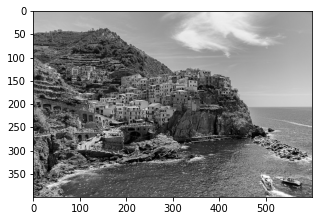

In [16]:
imgUrl = "https://www.w3schools.com/css/img_5terre.jpg"
url = f"{baseUrl}/filter?image={imgUrl}&filter=grey"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)
if response.text != "Error":
    url = response.json()["filtered_photo"]
    img = urlToImage(url)
    cv2_imshow(img)

http://127.0.0.1:5001/mask/segment?image=https://i.pinimg.com/736x/6e/4d/58/6e4d58de7bccdc3c382340a464a167fc--amazing-people-beautiful-people.jpg
{'data': [{'face': 'http://127.0.0.1:5001/static/output/_0_6e4d58de7bccdc3c382340a464a167fc--amazing-people-beautiful-people.jpg', 'features': {'Face': {'orientation': 'Left'}, 'Hat': {'center': [355, 247], 'rotation': -125}, 'Left_eye': {'center': [250.5, 430.0], 'height': 45.0, 'rotation': -175.72415161132812, 'width': 107.29864501953125}, 'Mouth': {'center': [351.0, 641.0], 'height': 53.00943374633789, 'rotation': -178.43064880371094, 'width': 146.05477905273438}, 'Right_eye': {'center': [473.0, 429.5], 'height': 56.4358024597168, 'rotation': 176.6615447998047, 'width': 120.20399475097656}}}]}


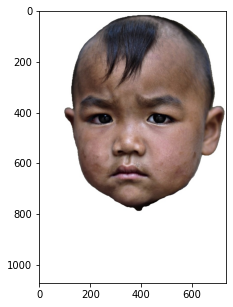

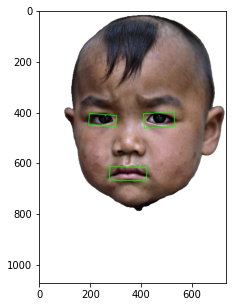

In [17]:
imageUrls = [
    # "https://images.unsplash.com/photo-1648817976872-3d43d615b329",
    # "https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_thumb-732x549.jpg",
    # "https://media1.popsugar-assets.com/files/thumbor/MjPiEL1c7rTUWc5qo-10Cr9DG74/fit-in/2048xorig/filters:format_auto-!!-:strip_icc-!!-/2014/11/24/864/n/1922441/8f8f3501b234abb6_FullSizeRender.jpg",
    # "https://i.pinimg.com/originals/ab/d2/8c/abd28cbe4f3057ce8765bd1555d7110f.jpg",
    # "https://i.pinimg.com/originals/40/c2/17/40c217baf6d2ce5b10a682fa06821751.jpg",
    # "https://rodmclean.com/wp-content/uploads/2013/11/G_RodMcLean_Paul.jpg",
    # "https://upload.wikimedia.org/wikipedia/commons/0/0a/Christian_Bale-7837.jpg",
    # "https://ilostat.ilo.org/wp-content/uploads/2019/10/ilo-e51651-highres-e1571408731569-1024x1024.jpg",
    # "https://i.pinimg.com/originals/60/11/fa/6011fa0368e1050c1ee78128bdced165.jpg",
    # "https://i.pinimg.com/originals/b0/c9/96/b0c996a887958b491e07b5eea22a0018.jpg",
    # "https://i.pinimg.com/736x/da/08/f3/da08f35d7a9c302199391983e4ecb867--studio-portraits-child-portraits.jpg",
    "https://i.pinimg.com/736x/6e/4d/58/6e4d58de7bccdc3c382340a464a167fc--amazing-people-beautiful-people.jpg"
]

def segmentApiTest(imageUrls = []):
    for imageUrl in imageUrls:
        url = f"{baseUrl}/segment?image={imageUrl}"
        print(url)
        payload={}
        headers = {}

        response = requests.request("GET", url, headers=headers, data=payload)

        # print(response.text)
        if response.text != "Error":
            json_data = json.loads(response.text)
            print(json_data)
            image = urlToImage(json_data['data'][0]['face'])
            # image = urlToImage(imageUrl)
            # image = cv2.imread('./static/output/_0_GettyImages-1092658864_thumb-732x549.jpg')
            cv2_imshow(image)
            json_data['data'][0]['features']['Face']['orientation']
            output_image = image.copy()

            output_image = drawFeatures(json_data['data'][0]['features'], output_image)

            cv2_imshow(output_image)
            cv2.imwrite('output.jpeg', output_image)

segmentApiTest(imageUrls)

In [9]:
url = f"{baseUrl}/features?image=https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_thumb-732x549.jpg"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)
json_data = json.loads(response.text)
print(json_data)
json_data['data']['Face']['orientation']

{"data":{"Face":{"orientation":"center"},"Hat":{"center":[371,153],"rotation":-112},"Left_eye":{"center":[315.0,262.5],"height":24.698177337646484,"rotation":-177.13758850097656,"width":60.074954986572266},"Mouth":{"center":[379.0,389.5],"height":28.017850875854492,"rotation":177.44384765625,"width":112.1115493774414},"Right_eye":{"center":[433.0,259.0],"height":28.44292449951172,"rotation":174.28941345214844,"width":60.29925537109375}},"photo":"http://staging.taptapstories.dk/static/output/GettyImages-1092658864_thumb-732x549.jpg"}

{'data': {'Face': {'orientation': 'center'}, 'Hat': {'center': [371, 153], 'rotation': -112}, 'Left_eye': {'center': [315.0, 262.5], 'height': 24.698177337646484, 'rotation': -177.13758850097656, 'width': 60.074954986572266}, 'Mouth': {'center': [379.0, 389.5], 'height': 28.017850875854492, 'rotation': 177.44384765625, 'width': 112.1115493774414}, 'Right_eye': {'center': [433.0, 259.0], 'height': 28.44292449951172, 'rotation': 174.28941345214844, 'width': 

'center'

In [ ]:
url = f"{baseUrl}/features?image=https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_thumb-732x549.jpg"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)
json_data = json.loads(response.text)
print(json_data)
json_data['data']['Face']['orientation']

In [6]:
# import cv2
# import mediapipe
# import numpy as np
# from models.parser import face_parser
# from tensorflow.compat.v1.keras import backend as K
# from config import MIN_CONF, MIN_CONF_FACE, COMPRESS_PCT, SEGMENT_CONF

# "A class that encapsulates all functionalities needed"
# class FeatureExtractor:
#     # The constructor only needs the input image
#     def __init__(self, image):
#         self.img = image
#         self.__results = []  # Mediapipe output
#         self.__features = {}  # A dictionary to store features

#     # Compress input image to a certain percentage (Default is 30%)
#     def __compressImg(self, percentage=COMPRESS_PCT):
#         newWidth = int(self.img.shape[1] * percentage)
#         newHeight = int(self.img.shape[0] * percentage)
#         newDim = (newWidth, newHeight)  # Width and height after compression

#         compressedImg = cv2.resize(self.img, newDim, interpolation = cv2.INTER_AREA)  # Resize to the new dimensions
#         return compressedImg

#     # Calls the compressImg() method and flips Red and Blue channels
#     def __processImg(self, compress):
#         if compress:
#             compressedImg = self.__compressImg()
#             copiedImg = compressedImg.copy()  
#         else:
#             copiedImg = self.img.copy()

#         formattedImg = cv2.cvtColor(copiedImg, cv2.COLOR_BGR2RGB)

#         face = mediapipe.solutions.face_mesh.FaceMesh(static_image_mode=True, max_num_faces=6, min_detection_confidence=MIN_CONF)

#         self.__results = face.process(formattedImg)  # Run the FaceMesh module from Mediapipe on the preprocessed image

#         return formattedImg.shape

#     # Helper function  to calculate the euclidean distance between two points
#     def __euclideanDistance(self, leftx, lefty, rightx, righty):
#         return np.sqrt((leftx-rightx)**2 +(lefty-righty)**2)

#     def singleContourMask(self, binary_mask):
#         contours, _ = cv2.findContours(binary_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        
#         mask = np.zeros(binary_mask.shape, binary_mask.dtype)
#         sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
#         cv2.drawContours(mask, [sorted_contours[0]], 0, (255.0), -1)
#         mask = cv2.bitwise_not(mask)
#         removed = cv2.subtract(binary_mask, mask)
#         return removed


#     # Helper function to calculate the absolute coordinates of a landmark point
#     def __getRelativePointCoords(self, image_shape, landmark):
#         """
#         This function returns the coordinates of a specified point on the input image.
#         Args:
#             image_shape:    The input image shape.
#             landmark:       The landmark feature.
#         Returns:
#             point_coords:   The coordinates of the specified point on the input image.
#         """
#         # Get the coordinates of the specified point.
#         x = int(landmark.x * image_shape[1])
#         y = int(landmark.y * image_shape[0])
#         point_coords = (x, y)
#         # Return the coordinates of the specified point relative to the top left corner of the input image.
#         return point_coords

#     landmarkDict = {
#         #Left, Right, Upper, Lower
#         "left_eye": [130,243,27,33],
#         "right_eye": [463,359,257,253],
#         "mouth": [61,291,0,17]
#     }

#     # Calculate features for landmarks
#     def __calc(self, landmarks, entity, shape):
#         if entity in self.landmarkDict:
#             l1, l2 = landmarks[self.landmarkDict[entity][0]], landmarks[self.landmarkDict[entity][1]]
#             l3, l4 = landmarks[self.landmarkDict[entity][2]], landmarks[self.landmarkDict[entity][3]]
#         else:
#             return None
#         c1 = self.__getRelativePointCoords(shape, l1)
#         c2 = self.__getRelativePointCoords(shape, l2)
#         pts = np.array([c1, c2])
#         rectH = list(cv2.minAreaRect(pts))
#         c3 = self.__getRelativePointCoords(shape, l3)
#         c4 = self.__getRelativePointCoords(shape, l4)
#         pts = np.array([c3, c4])
#         rectV = list(cv2.minAreaRect(pts))

#         width = rectH[1][0]
#         rotation = rectH[2]
#         height = rectV[1][0]
#         center = rectH[0]
#         return {'rotation': rotation, 'width': width, 'height': height,
#                                                         'center': center}
    
#     # Main method that extracts different features
#     def extractFeatures(self, faceOrient=True, extractMouth=True, compress=True):
#         """ 
#         A quick guide to different features IDs

#         Left Eye Left Point --> 130
#         Left Eye Right Point --> 243
#         Left Eye Upper Point --> 27
#         Left Eye Lower Point --> 23

#         Right Eye Left Point --> 463
#         Right Eye Right Point --> 359
#         Right Eye Upper Point --> 257
#         Right Eye Lower Point --> 253

#         Face Center Point --> 5
#         Face Left Point --> 93
#         Face Right Point --> 323

#         Mouth Left Point --> 61
#         Mouth Right Point --> 291
#         Upper Lip Upper Point --> 0
#         Upper Lip Lower Point --> 13
#         Lower Lip Upper Point --> 14
#         Lower Lip Lower Point --> 17

#         Hat Center --> 10
#         """
#         # Call the processImg() method
#         height, width, _ = self.__processImg(compress)

#         height, width = self.img.shape[:2]
#         # Proceed if face landmarks are detected
#         if self.__results.multi_face_landmarks != None:
#             counter = 0  # Keeps track of number of faces
            
#             for facial_landmarks in self.__results.multi_face_landmarks:
#                 landmarks = facial_landmarks.landmark
#                 # Update the features dictionary
#                 self.__features['Left_eye'] = self.__calc(landmarks, "left_eye", (height, width))
#                 self.__features['Right_eye'] = self.__calc(landmarks, "right_eye", (height, width))

#                 """ Hat Attributes """
#                 hatCenterX = int((landmarks[10].x) * width)
#                 hatCenterY = int((landmarks[10].y) * height)
#                 hatCenter = [hatCenterX, hatCenterY]  # Center
#                 hatAngle = round((np.degrees(np.arctan2(hatCenterX, hatCenterY)) - 180))  # Rotation Angle
#                 # Update the features dictionary
#                 self.__features['Hat'] = {'rotation': hatAngle, 'center': hatCenter}

#                 # Find the face orientation if requested by the user
#                 if faceOrient:
#                     faceLeftPt = [int((landmarks[93].x) * width), int((landmarks[93].y) * height)]
#                     faceRightPt = [int((landmarks[323].x) * width), int((landmarks[323].y) * height)]
#                     faceCenterPt = [int((landmarks[5].x) * width), int((landmarks[5].y) * height)]
                    
#                     left2cen_dis = int(self.__euclideanDistance(faceLeftPt[0], faceLeftPt[1], faceCenterPt[0], faceCenterPt[1]))  # Left to center margin
#                     right2cen_dis = int(self.__euclideanDistance(faceRightPt[0], faceRightPt[1], faceCenterPt[0], faceCenterPt[1]))  # Right to center margin

#                     diff = abs(left2cen_dis - right2cen_dis)  # Margins difference
#                     if diff > 10:
#                         if left2cen_dis < right2cen_dis:
#                             pos = 'Left'
#                         elif left2cen_dis > right2cen_dis:
#                             pos = 'right'
#                         else:
#                             pos = 'center'
#                     else:
#                         pos = 'center'

#                     # Update the features dictionary
#                     self.__features['Face'] = {'orientation': pos}

#                 if extractMouth:
#                     # Update the features dictionary
#                     self.__features['Mouth'] = self.__calc(landmarks, "mouth", (height, width))

#                 counter += 1
            
#             return self.__features


#     # Helper function
#     def __resizeImage(self, im, max_size=768):
#         if np.max(im.shape) > max_size:
#             ratio = max_size / np.max(im.shape)
#             return cv2.resize(im, (0,0), fx=ratio, fy=ratio)

#         return im


#     # Returns a list of all faces detected
#     def __detectFace(self, images):
#         try:
#             faces = []
#             prs = face_parser.FaceParser()

#             for image in images:
#                 # Resize image
#                 image = self.__resizeImage(image)

#                 output_image = image.copy()

#                 segmentation_output = prs.parse_face(image)[0]
                
#                 binary_mask = np.ones(shape=[segmentation_output.shape[0],segmentation_output.shape[1]]) * 255
#                 # binary_mask[segmentation_output==17] = 0 # HAIR
#                 binary_mask[segmentation_output==16] = 0 # CLOTHES
#                 binary_mask[segmentation_output==15] = 0 # ??
#                 binary_mask[segmentation_output==14] = 0 # NECK
#                 binary_mask[segmentation_output==0] = 0 # BACKGROUND

#                 # Enlarge the mask
#                 dilatation_size = 3
#                 dilatation_type = cv2.MORPH_CROSS
#                 element = cv2.getStructuringElement(dilatation_type,(2*dilatation_size + 1, 2*dilatation_size+1),(dilatation_size, dilatation_size))
#                 # binary_mask = cv2.dilate(binary_mask, element)
#                 binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, element)
#                 # apply smoothing to the mask
#                 blur_level = 2
#                 binary_mask = cv2.blur(binary_mask, (blur_level, blur_level))

#                 # blur alpha channel
#                 binary_mask = cv2.GaussianBlur(binary_mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
#                 import skimage
#                 binary_mask = skimage.exposure.rescale_intensity(binary_mask, in_range=(127.5, 255), out_range=(0,255))


#                 binary_mask[segmentation_output==17] = 255 # HAIR
#                 binary_mask = self.singleContourMask(binary_mask)
                
#                 output_image[binary_mask<127.5] = 255

#                 faces.append(np.dstack((output_image, binary_mask)))
#             K.clear_session()
#             return faces
#         except Exception as e:
#             # print(e)
#             K.clear_session() 

#     # Segments all faces detected
#     def segmentFace(self, image):
#         # Get the height and width of the input image.
#         try:
#             image_height, image_width, _ = image.shape

#             cropped_images = []

#             mp_face_detection = mediapipe.solutions.face_detection
#             mp_face_detector = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=MIN_CONF_FACE)

#             # Perform the face detection on the image.
#             results = mp_face_detector.process(image)
#             # print(results.detections)
#             croppedFaces = []

#             # Check if the face(s) in the image are found.
#             if results.detections:

#                 # Iterate over the found faces.
#                 for face_no, face in enumerate(results.detections):
#                     # print(face_no)
#                     face_bbox = face.location_data.relative_bounding_box

#                     # Retrieve the required bounding box coordinates and scale them according to the size of original input image.
#                     x1 = int(face_bbox.xmin * image_width)
#                     y1 = int(face_bbox.ymin * image_height)

#                     bbox_width = int(face_bbox.width * image_width)
#                     bbox_height = int(face_bbox.height * image_height)

#                     x2 = x1 + bbox_width
#                     y2 = y1 + bbox_height

#                     # Add some padding
#                     x1 = x1 - int(bbox_width / 2)
#                     y1 = y1 - int((bbox_height / 2) * 1.3)
#                     x2 = x2 + int(bbox_width / 2)
#                     y2 = y2 + int((bbox_height / 2) * 1.3)

#                     if x1 < 0:
#                         x1 = 0

#                     if y1 < 0:
#                         y1 = 0

#                     if x2 > image_width:
#                         x2 = image_width

#                     if y2 > image_height:
#                         x2 = image_height
                    
#                     face_crop = image[y1:y2, x1:x2]
#                     # cv2.imwrite("OUTPUT.png", face_crop)
#                     cropped_images.append(face_crop)
                
#                 croppedFaces = self.__detectFace(cropped_images)
#                 # for i, face in enumerate(croppedFaces):
#                 #     color = [255, 255, 255]
#                 #     delta_w = image_width - face.shape[1]
#                 #     delta_h = image_height - face.shape[0]
#                 #     croppedFaces[i] = cv2.copyMakeBorder(face, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT,
#                 #         value=color)
#                 K.clear_session()
#                 return croppedFaces
#             else:   
#                 raise Exception("No faces found in the image.")
#         except Exception as e:    
#             print(e)
#             K.clear_session()    


#     # Upscales the image using super resolution
#     def upscale(self, scalar):
#         scaling_dict = {'2': "models/EDSR_x2.pb", '4': "models/EDSR_x4.pb"}  # A dict to select the appropriate model

#         sr = cv2.dnn_superres.DnnSuperResImpl_create()  # SR opencv object

#         path = scaling_dict[scalar]

#         # Read and set the selected model
#         sr.readModel(path)
#         sr.setModel("edsr", int(scalar))

#         # Upscales the input image
#         copiedImg = self.img.copy()
#         result = sr.upsample(copiedImg)

#         return result

# Fixes

In [6]:
from utils.FeatureExtractor import FeatureExtractor
import cv2
import numpy as np

Instructions for updating:
Colocations handled automatically by placer.


c:\Users\cools\Documents\GitHub\python\Facial_features_extraction\env\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1


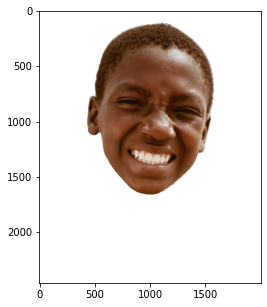

{'Left_eye': {'rotation': -170.31121826171875, 'width': 249.5596160888672, 'height': 114.12712097167969, 'center': (834.0, 841.0)}, 'Right_eye': {'rotation': -171.86988830566406, 'width': 226.274169921875, 'height': 110.05453491210938, 'center': (1302.0, 917.0)}, 'Hat': {'rotation': -115, 'center': [1132, 539]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': -171.43548583984375, 'width': 503.6159362792969, 'height': 271.1051330566406, 'center': (1009.0, 1274.5)}}


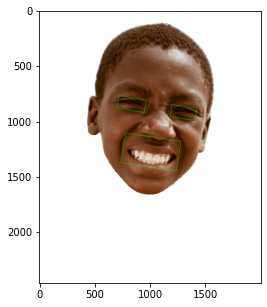

In [7]:
imageUrls = [
    "https://taptapstories.com/myfiles/uploads/KarpEm2zj8YRdMlGeaBKPU7WdzYT1G2vVhcNkcS7.jpg"
]

def segmentFuncTest(imageUrls = []):
    for imageUrl in imageUrls:
        
        image = urlToImage(imageUrl)
        fe = FeatureExtractor(image)
        segment = fe.segmentFace(image)
        if segment is not None:
            print(len(segment))

            for idx, seg in enumerate(segment):
                seg = seg.astype(np.uint8)
                cv2_imshow(seg)
                fe.img = seg.copy()
                try:
                    json_data = fe.extractFeatures()
                    print(json_data)
                    output_image = drawFeatures(json_data, seg)

                    cv2_imshow(output_image)
                    # cv2.imwrite(f'output/{i}_face_{idx}.png', output_image)
                except Exception as e:
                    print(e)
                    pass
                
        else:
            print("No faces found")

segmentFuncTest(imageUrls)

0
No faces found
1


d:\GitHub\Facial_features_extraction\env\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1


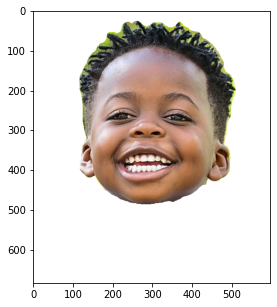

{'Left_eye': {'rotation': 177.54595947265625, 'width': 70.06425476074219, 'height': 37.53664779663086, 'center': (220.0, 266.5)}, 'Right_eye': {'rotation': -175.4260711669922, 'width': 75.23961639404297, 'height': 39.051246643066406, 'center': (361.5, 268.0)}, 'Hat': {'rotation': -120, 'center': [290, 166]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': -177.72454833984375, 'width': 151.11915588378906, 'height': 87.14356231689453, 'center': (285.5, 375.0)}}


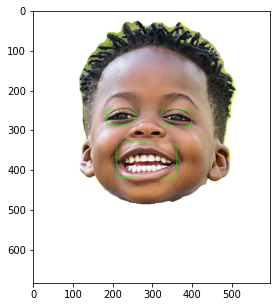

2
2


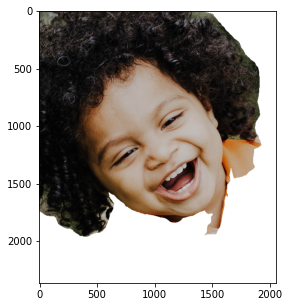

{'Left_eye': {'rotation': 143.97262573242188, 'width': 258.4279479980469, 'height': 111.12605285644531, 'center': (752.5, 1257.0)}, 'Right_eye': {'rotation': 140.66238403320312, 'width': 250.83261108398438, 'height': 111.50785064697266, 'center': (1150.0, 950.5)}, 'Hat': {'rotation': -139, 'center': [740, 837]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': 142.23414611816406, 'width': 460.456298828125, 'height': 263.00189208984375, 'center': (1198.0, 1408.0)}}


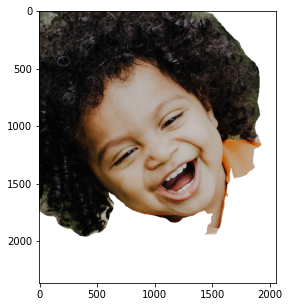

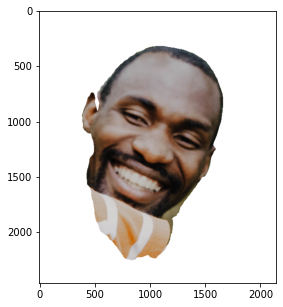

{'Left_eye': {'rotation': -153.43495178222656, 'width': 261.6199645996094, 'height': 114.54257202148438, 'center': (872.0, 964.5)}, 'Right_eye': {'rotation': -158.37680053710938, 'width': 238.80535888671875, 'height': 117.0042724609375, 'center': (1327.0, 1171.0)}, 'Hat': {'rotation': -120, 'center': [1270, 721]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': -156.3043975830078, 'width': 544.9421997070312, 'height': 171.29214477539062, 'center': (923.5, 1466.5)}}


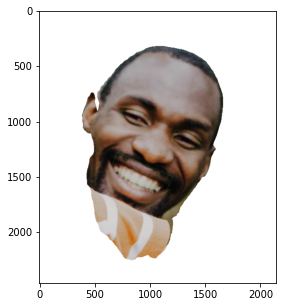

3
2


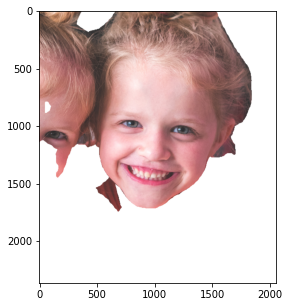

{'Left_eye': {'rotation': -169.33383178710938, 'width': 226.92068481445312, 'height': 92.61209106445312, 'center': (799.5, 993.0)}, 'Right_eye': {'rotation': -176.50155639648438, 'width': 229.42755126953125, 'height': 98.08159637451172, 'center': (1238.5, 1048.0)}, 'Hat': {'rotation': -122, 'center': [1064, 658]}, 'Face': {'orientation': 'center'}, 'Mouth': {'rotation': -171.81747436523438, 'width': 463.7208251953125, 'height': 150.6154022216797, 'center': (977.5, 1368.0)}}


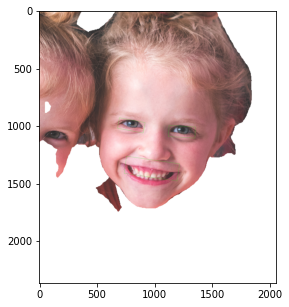

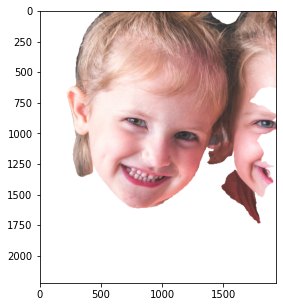

{'Left_eye': {'rotation': -158.1063232421875, 'width': 230.6339111328125, 'height': 97.26766967773438, 'center': (783.0, 926.0)}, 'Right_eye': {'rotation': -172.656982421875, 'width': 195.60418701171875, 'height': 101.51354217529297, 'center': (1174.0, 1033.5)}, 'Hat': {'rotation': -121, 'center': [1101, 667]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': -163.94577026367188, 'width': 433.92279052734375, 'height': 151.5387725830078, 'center': (859.5, 1299.0)}}


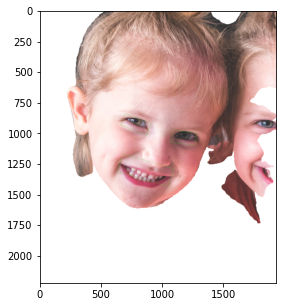

4
1


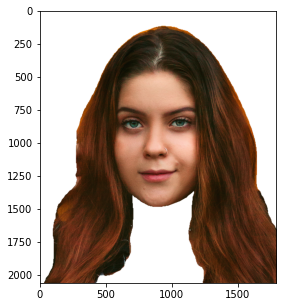

{'Left_eye': {'rotation': -174.68545532226562, 'width': 172.74258422851562, 'height': 77.20103454589844, 'center': (705.0, 865.0)}, 'Right_eye': {'rotation': 174.1674346923828, 'width': 186.96791076660156, 'height': 95.42536163330078, 'center': (1058.0, 862.5)}, 'Hat': {'rotation': -123, 'center': [868, 560]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': 179.79608154296875, 'width': 281.00177001953125, 'height': 96.25486755371094, 'center': (885.5, 1222.5)}}


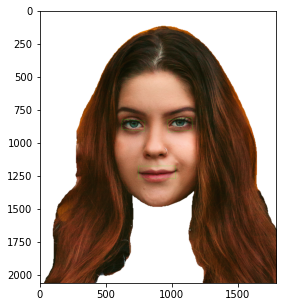

5
1


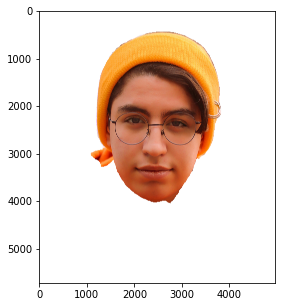

{'Left_eye': {'rotation': -173.162353515625, 'width': 445.166259765625, 'height': 192.13015747070312, 'center': (2016.0, 2335.5)}, 'Right_eye': {'rotation': -178.97007751464844, 'width': 445.0718994140625, 'height': 215.41587829589844, 'center': (2892.5, 2397.0)}, 'Hat': {'rotation': -123, 'center': [2496, 1613]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': -176.64271545410156, 'width': 734.2601928710938, 'height': 250.04998779296875, 'center': (2420.5, 3341.5)}}


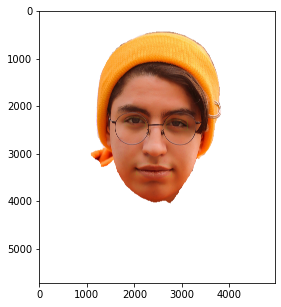

6
1


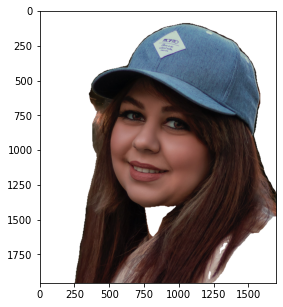

{'Left_eye': {'rotation': -165.11846923828125, 'width': 147.96282958984375, 'height': 65.802734375, 'center': (674.5, 765.0)}, 'Right_eye': {'rotation': -172.54293823242188, 'width': 192.62918090820312, 'height': 92.04889678955078, 'center': (989.5, 822.5)}, 'Hat': {'rotation': -122, 'center': [853, 543]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': -167.49188232421875, 'width': 300.1233215332031, 'height': 120.20399475097656, 'center': (770.5, 1122.5)}}


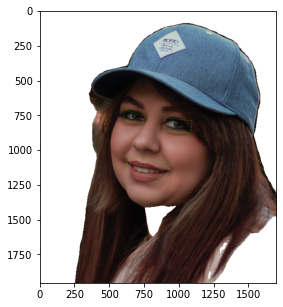

7
1


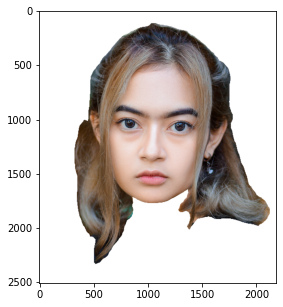

{'Left_eye': {'rotation': -169.5821533203125, 'width': 226.73773193359375, 'height': 97.94386291503906, 'center': (838.5, 1063.5)}, 'Right_eye': {'rotation': 175.54440307617188, 'width': 231.7002410888672, 'height': 130.5411834716797, 'center': (1283.5, 1086.0)}, 'Hat': {'rotation': -123, 'center': [1075, 687]}, 'Face': {'orientation': 'center'}, 'Mouth': {'rotation': -177.13758850097656, 'width': 300.374755859375, 'height': 125.09996032714844, 'center': (1040.0, 1528.5)}}


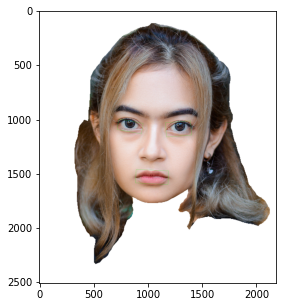

8
5


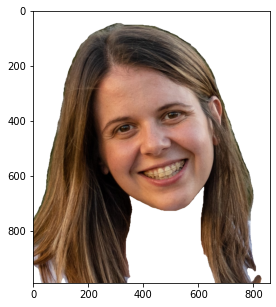

{'Left_eye': {'rotation': 165.65066528320312, 'width': 88.76936340332031, 'height': 38.41874694824219, 'center': (338.0, 433.0)}, 'Right_eye': {'rotation': 161.95216369628906, 'width': 93.60555267333984, 'height': 38.470767974853516, 'center': (506.5, 383.5)}, 'Hat': {'rotation': -126, 'center': [381, 272]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': 163.4126434326172, 'width': 196.16319274902344, 'height': 84.43340301513672, 'center': (470.0, 559.0)}}


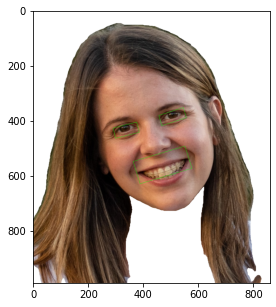

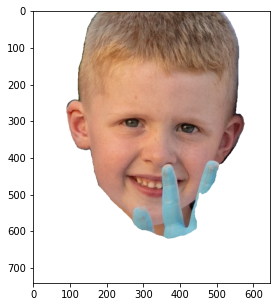

{'Left_eye': {'rotation': -171.57302856445312, 'width': 81.88406372070312, 'height': 33.105892181396484, 'center': (268.5, 308.0)}, 'Right_eye': {'rotation': -177.02626037597656, 'width': 77.10382843017578, 'height': 33.52610778808594, 'center': (420.5, 324.0)}, 'Hat': {'rotation': -118, 'center': [359, 189]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': -174.53977966308594, 'width': 136.61990356445312, 'height': 53.46026611328125, 'center': (330.0, 458.5)}}


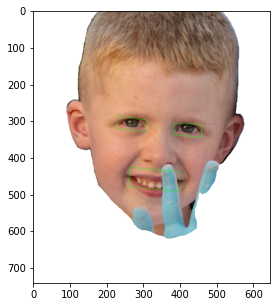

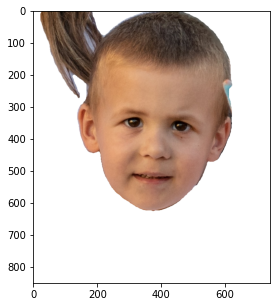

{'Left_eye': {'rotation': -171.46922302246094, 'width': 80.8949966430664, 'height': 33.105892181396484, 'center': (312.0, 352.0)}, 'Right_eye': {'rotation': -178.5312042236328, 'width': 78.025634765625, 'height': 37.10795211791992, 'center': (463.0, 366.0)}, 'Hat': {'rotation': -119, 'center': [403, 224]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': -175.4260711669922, 'width': 125.39936065673828, 'height': 43.185646057128906, 'center': (373.5, 515.0)}}


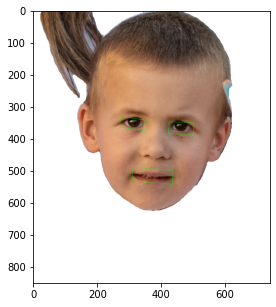

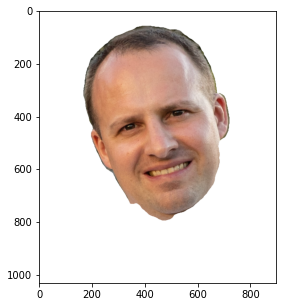

{'Left_eye': {'rotation': 165.22544860839844, 'width': 94.11163330078125, 'height': 38.897300720214844, 'center': (345.5, 444.0)}, 'Right_eye': {'rotation': 163.7397918701172, 'width': 100.0, 'height': 36.055511474609375, 'center': (528.0, 394.0)}, 'Hat': {'rotation': -124, 'center': [394, 266]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': 164.21319580078125, 'width': 198.4867706298828, 'height': 62.93647766113281, 'center': (486.5, 586.0)}}


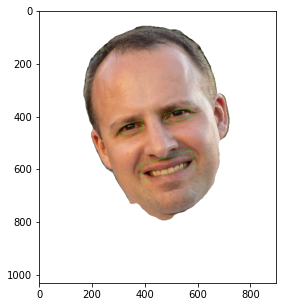

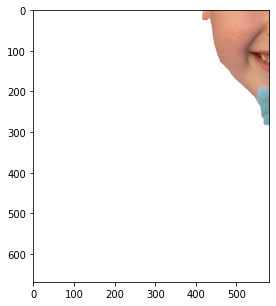

None
'NoneType' object has no attribute 'keys'
9
1


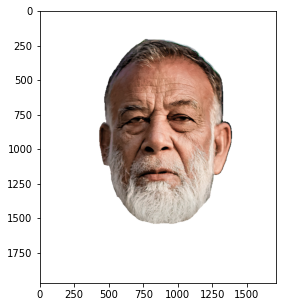

{'Left_eye': {'rotation': 173.69837951660156, 'width': 163.99085998535156, 'height': 79.93122100830078, 'center': (688.5, 805.0)}, 'Right_eye': {'rotation': 180.0, 'width': 176.0, 'height': 89.20201873779297, 'center': (1026.0, 788.0)}, 'Hat': {'rotation': -121, 'center': [845, 501]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': 177.57196044921875, 'width': 283.2543029785156, 'height': 110.16351318359375, 'center': (854.5, 1183.0)}}


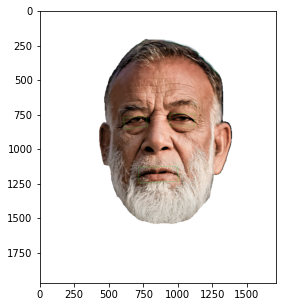

10
1


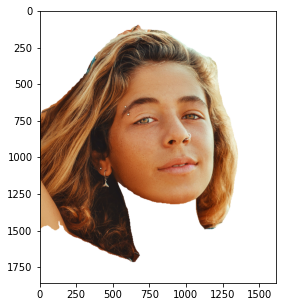

{'Left_eye': {'rotation': 172.79750061035156, 'width': 183.44754028320312, 'height': 95.58765411376953, 'center': (721.0, 762.5)}, 'Right_eye': {'rotation': 174.8826904296875, 'width': 134.53623962402344, 'height': 90.19977569580078, 'center': (1029.0, 730.0)}, 'Hat': {'rotation': -120, 'center': [858, 503]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': 171.47972106933594, 'width': 269.9796142578125, 'height': 120.33702850341797, 'center': (945.5, 1065.0)}}


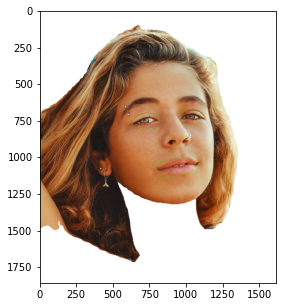

11
1


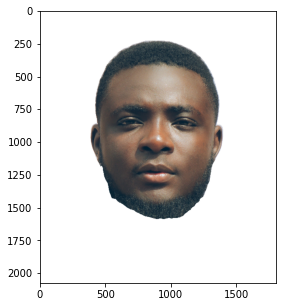

{'Left_eye': {'rotation': 179.14913940429688, 'width': 202.02227783203125, 'height': 90.97252655029297, 'center': (688.0, 856.5)}, 'Right_eye': {'rotation': -177.1518096923828, 'width': 201.24859619140625, 'height': 86.5794448852539, 'center': (1091.5, 863.0)}, 'Hat': {'rotation': -122, 'center': [899, 552]}, 'Face': {'orientation': 'center'}, 'Mouth': {'rotation': -178.5312042236328, 'width': 312.1025390625, 'height': 131.0152587890625, 'center': (883.0, 1244.0)}}


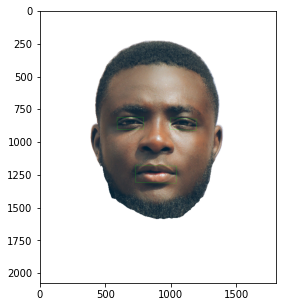

12
1


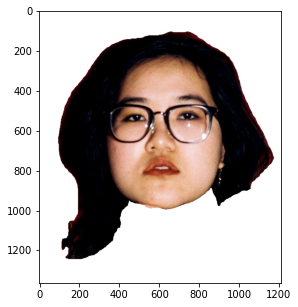

{'Left_eye': {'rotation': -179.0906219482422, 'width': 126.015869140625, 'height': 63.639610290527344, 'center': (484.0, 545.0)}, 'Right_eye': {'rotation': 176.50535583496094, 'width': 131.24404907226562, 'height': 76.00657653808594, 'center': (736.5, 538.0)}, 'Hat': {'rotation': -118, 'center': [601, 318]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': 178.73399353027344, 'width': 181.044189453125, 'height': 83.15046691894531, 'center': (615.5, 802.0)}}


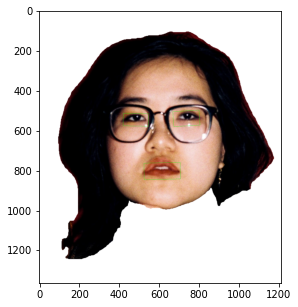

13
1


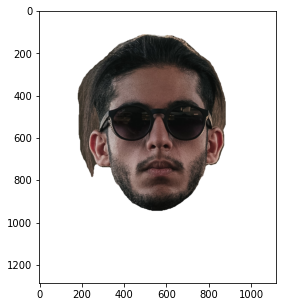

{'Left_eye': {'rotation': 176.3915252685547, 'width': 111.22050476074219, 'height': 57.28001403808594, 'center': (452.5, 526.5)}, 'Right_eye': {'rotation': 179.46949768066406, 'width': 108.00463104248047, 'height': 60.074954986572266, 'center': (669.0, 519.5)}, 'Hat': {'rotation': -121, 'center': [559, 334]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': 177.49490356445312, 'width': 160.15304565429688, 'height': 65.0076904296875, 'center': (570.0, 747.5)}}


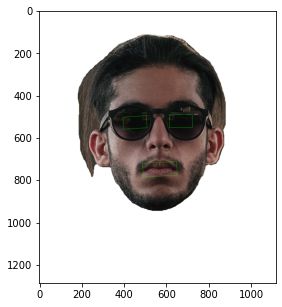

14
1


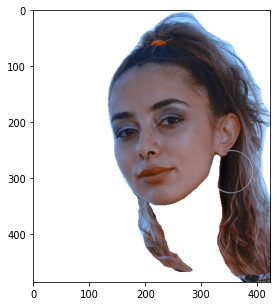

{'Left_eye': {'rotation': 168.02386474609375, 'width': 33.734256744384766, 'height': 17.464248657226562, 'center': (167.5, 216.5)}, 'Right_eye': {'rotation': 165.37911987304688, 'width': 47.53945541381836, 'height': 26.476404190063477, 'center': (243.0, 197.0)}, 'Hat': {'rotation': -127, 'center': [182, 137]}, 'Face': {'orientation': 'Left'}, 'Mouth': {'rotation': 168.15792846679688, 'width': 63.348243713378906, 'height': 24.041629791259766, 'center': (218.0, 291.5)}}


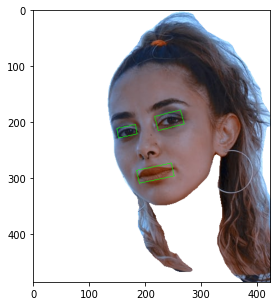

15
0


In [31]:
def runAllTests():
    for i in range(0,16):
        print(i)
        image = cv2.imread(f"Test_data/Test{i}.jpg")
        fe = FeatureExtractor(image)
        segment = fe.segmentFace(image)
        # print(segment)
        if segment is not None:
            print(len(segment))

            for idx, seg in enumerate(segment):
                seg = seg.astype(np.uint8)
                cv2_imshow(seg)
                fe.img = seg.copy()
                try:
                    json_data = fe.extractFeatures()
                    print(json_data)
                    output_image = drawFeatures(json_data, seg)

                    cv2_imshow(output_image)
                    cv2.imwrite(f'output/{i}_face_{idx}.png', output_image)
                except Exception as e:
                    print(e)
                    pass
                
        else:
            print("No faces found")
runAllTests()